In [1]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', family='Arial Unicode MS')
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

import folium
import json
from glob import glob
import missingno as msno

## float format 설정
## exponential to numeric (지수를 숫자로)
pd.options.display.float_format = '{:.2f}'.format
## 다시 지수 방식으로
# pd.reset_option('^display.', silent=True)

## 1. 데이터 임포트

- 시장규모

In [2]:
# Market size data 불러오기
df = pd.read_csv('./datas/market_size_reform.csv', encoding='utf-8')
df_ms = pd.DataFrame(df)
df_ms.head()

,년도,시장규모,산업분류
0,1995,855409035,전체
1,2000,1395749584,전체
2,2005,2058128879,전체
3,2006,2203889676,전체
4,2007,2396507678,전체


In [3]:
df_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      352 non-null    int64 
 1   시장규모    352 non-null    int64 
 2   산업분류    352 non-null    object
dtypes: int64(2), object(1)
memory usage: 8.4+ KB


- 시총

In [4]:
# Market capitalization data 불러오기
df = pd.read_csv('./datas/mcz_by_industry_reform.csv', encoding='euc-kr')
df_mc = pd.DataFrame(df).drop(columns='Unnamed: 0')
df_mc.head()

,년도,산업분류,시총
0,2004,"농업, 임업 및 어업",195279
1,2005,"농업, 임업 및 어업",243346
2,2006,"농업, 임업 및 어업",269164
3,2007,"농업, 임업 및 어업",735154
4,2008,"농업, 임업 및 어업",702432


In [5]:
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      336 non-null    int64 
 1   산업분류    336 non-null    object
 2   시총      336 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ KB


- 매출

In [6]:
# Market Income data 불러오기
df = pd.read_csv('./datas/revenue_total.csv', encoding='utf-8')
df_mi = pd.DataFrame(df).rename(columns={'산업':'산업분류'})
df_mi.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%)
0,건설업,2004,56,37431491,1531674,2719852,2181880,13.81,4.08,29.86,5.66,11.85,6.81
1,건설업,2005,54,40785394,2029565,3096864,2885231,3.67,4.96,36.71,6.78,13.24,7.92
2,건설업,2006,57,44745972,2755247,3657870,3652228,12.41,5.85,46.30,7.95,14.79,8.86
3,건설업,2007,57,47834524,2802313,3566035,3718370,5.07,4.87,38.70,6.54,11.28,6.45
4,건설업,2008,56,53570702,3195413,3672975,4577360,16.48,4.12,37.41,6.09,9.69,5.47


In [7]:
df_mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   산업분류          352 non-null    object 
 1   년도            352 non-null    int64  
 2   회사수 (개)       352 non-null    int64  
 3   매출액 (백만원)     352 non-null    int64  
 4   당기순이익 (백만원)   352 non-null    int64  
 5   영업이익 (백만원)    352 non-null    int64  
 6   경상이익 (백만원)    352 non-null    int64  
 7   매출액증가율 (%)    352 non-null    float64
 8   매출액이익률 (%)    352 non-null    float64
 9   납입자본이익률 (%)   352 non-null    float64
 10  매출액경상이익률 (%)  352 non-null    float64
 11  자기자본이익률 (%)   352 non-null    float64
 12  총자본경상이익률 (%)  352 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 35.9+ KB


## 2. 비교

In [8]:
print(df_ms.shape, df_mc.shape, df_mi.shape)
print(len(df_ms), len(df_mc), len(df_mi))

(352, 3) (336, 3) (352, 13)
352 336 352


In [9]:
print(df_ms['년도'].unique())
print(df_mc['년도'].unique())
print(df_mi['년도'].unique())
print(df_ms['산업분류'].unique())
print(df_mc['산업분류'].unique())
print(df_mi['산업분류'].unique())

[1995 2000 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018]
[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]
[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]
['전체' '농업, 임업 및 어업' '광업' '제조업' '음식료품' '섬유의복' '종이·목재' '화학' '의약품' '비금속광물'
 '철강금속' '기계' '전기전자' '의료·정밀기기' '운수장비' '기타제조업' '유통업' '전기가스' '건설업' '운수창고업'
 '통신업' '서비스업']
['농업, 임업 및 어업' '광업' '제조업' '음식료품' '섬유의복' '종이·목재' '화학' '의약품' '비금속광물' '철강금속'
 '기계' '전기전자' '의료·정밀기기' '운수장비' '기타제조업' '유통업' '전기가스' '건설업' '운수창고업' '통신업'
 '서비스업']
['건설업' '광업' '기계' '기타제조업' '농업, 임업 및 어업' '비금속광물' '서비스업' '섬유의복' '운수장비'
 '운수창고업' '유통업' '음식료품' '의료·정밀기기' '의약품' '전기가스' '전기전자' '전체' '종이·목재' '철강금속'
 '통신업' '화학' '제조업']


In [17]:
df1 = pd.DataFrame(df_ms['산업분류'].unique())
df2 = pd.DataFrame(df_mc['산업분류'].unique())
df3 = pd.DataFrame(df_mi['산업분류'].unique())

In [20]:
## df 2에는 '전체' 없다, df1 == df3
checker = df2.merge(df3, how='outer', suffixes=['', '_'], indicator=True)
checker

,0,_merge
0,"농업, 임업 및 어업",both
1,광업,both
2,제조업,both
3,음식료품,both
4,섬유의복,both
5,종이·목재,both
6,화학,both
7,의약품,both
8,비금속광물,both
9,철강금속,both


In [21]:
df1 = pd.DataFrame(df_ms['년도'].unique())
df2 = pd.DataFrame(df_mc['년도'].unique())
df3 = pd.DataFrame(df_mi['년도'].unique())

In [22]:
checker = df3.merge(df2, how='outer', suffixes=['', '_'], indicator=True)
checker
## 1995, 2000은 df1 에만, 2004 2019는 df2에만 , df2 == df3

,0,_merge
0,2004,both
1,2005,both
2,2006,both
3,2007,both
4,2008,both
5,2009,both
6,2010,both
7,2011,both
8,2012,both
9,2013,both


## 3. 합치기

In [23]:
# MS / MC DataFrame 합치기
df_msmc = pd.merge(df_ms, df_mc, how='outer', on=['산업분류','년도'])
df_msmc = df_msmc[['산업분류', '년도', '시장규모', '시총']]
df_msmc.head()

,산업분류,년도,시장규모,시총
0,전체,1995,855409035.00,nan
1,전체,2000,1395749584.00,nan
2,전체,2005,2058128879.00,nan
3,전체,2006,2203889676.00,nan
4,전체,2007,2396507678.00,nan


In [24]:
df_msmc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 393
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   산업분류    394 non-null    object 
 1   년도      394 non-null    int64  
 2   시장규모    352 non-null    float64
 3   시총      336 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [25]:
df_msmc.loc[df_msmc['시장규모'].isnull(),'년도'].unique()

array([2004, 2019])

In [26]:
industry_df = pd.merge(df_mi, df_msmc, on=['산업분류','년도'], how='outer')
industry_df

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2004,56.00,37431491.00,1531674.00,2719852.00,2181880.00,13.81,4.08,29.86,5.66,11.85,6.81,nan,12256577.00
1,건설업,2005,54.00,40785394.00,2029565.00,3096864.00,2885231.00,3.67,4.96,36.71,6.78,13.24,7.92,150470135.00,26444487.00
2,건설업,2006,57.00,44745972.00,2755247.00,3657870.00,3652228.00,12.41,5.85,46.30,7.95,14.79,8.86,153315180.00,33138291.00
3,건설업,2007,57.00,47834524.00,2802313.00,3566035.00,3718370.00,5.07,4.87,38.70,6.54,11.28,6.45,166693235.00,53907176.00
4,건설업,2008,56.00,53570702.00,3195413.00,3672975.00,4577360.00,16.48,4.12,37.41,6.09,9.69,5.47,180679909.00,22653768.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,운수창고업,2000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,38500237.00,nan
392,통신업,1995,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11866977.00,nan
393,통신업,2000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,34293059.00,nan
394,서비스업,1995,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,299877634.00,nan


## 4. 데이터프레임 정리
- Null row 없애기

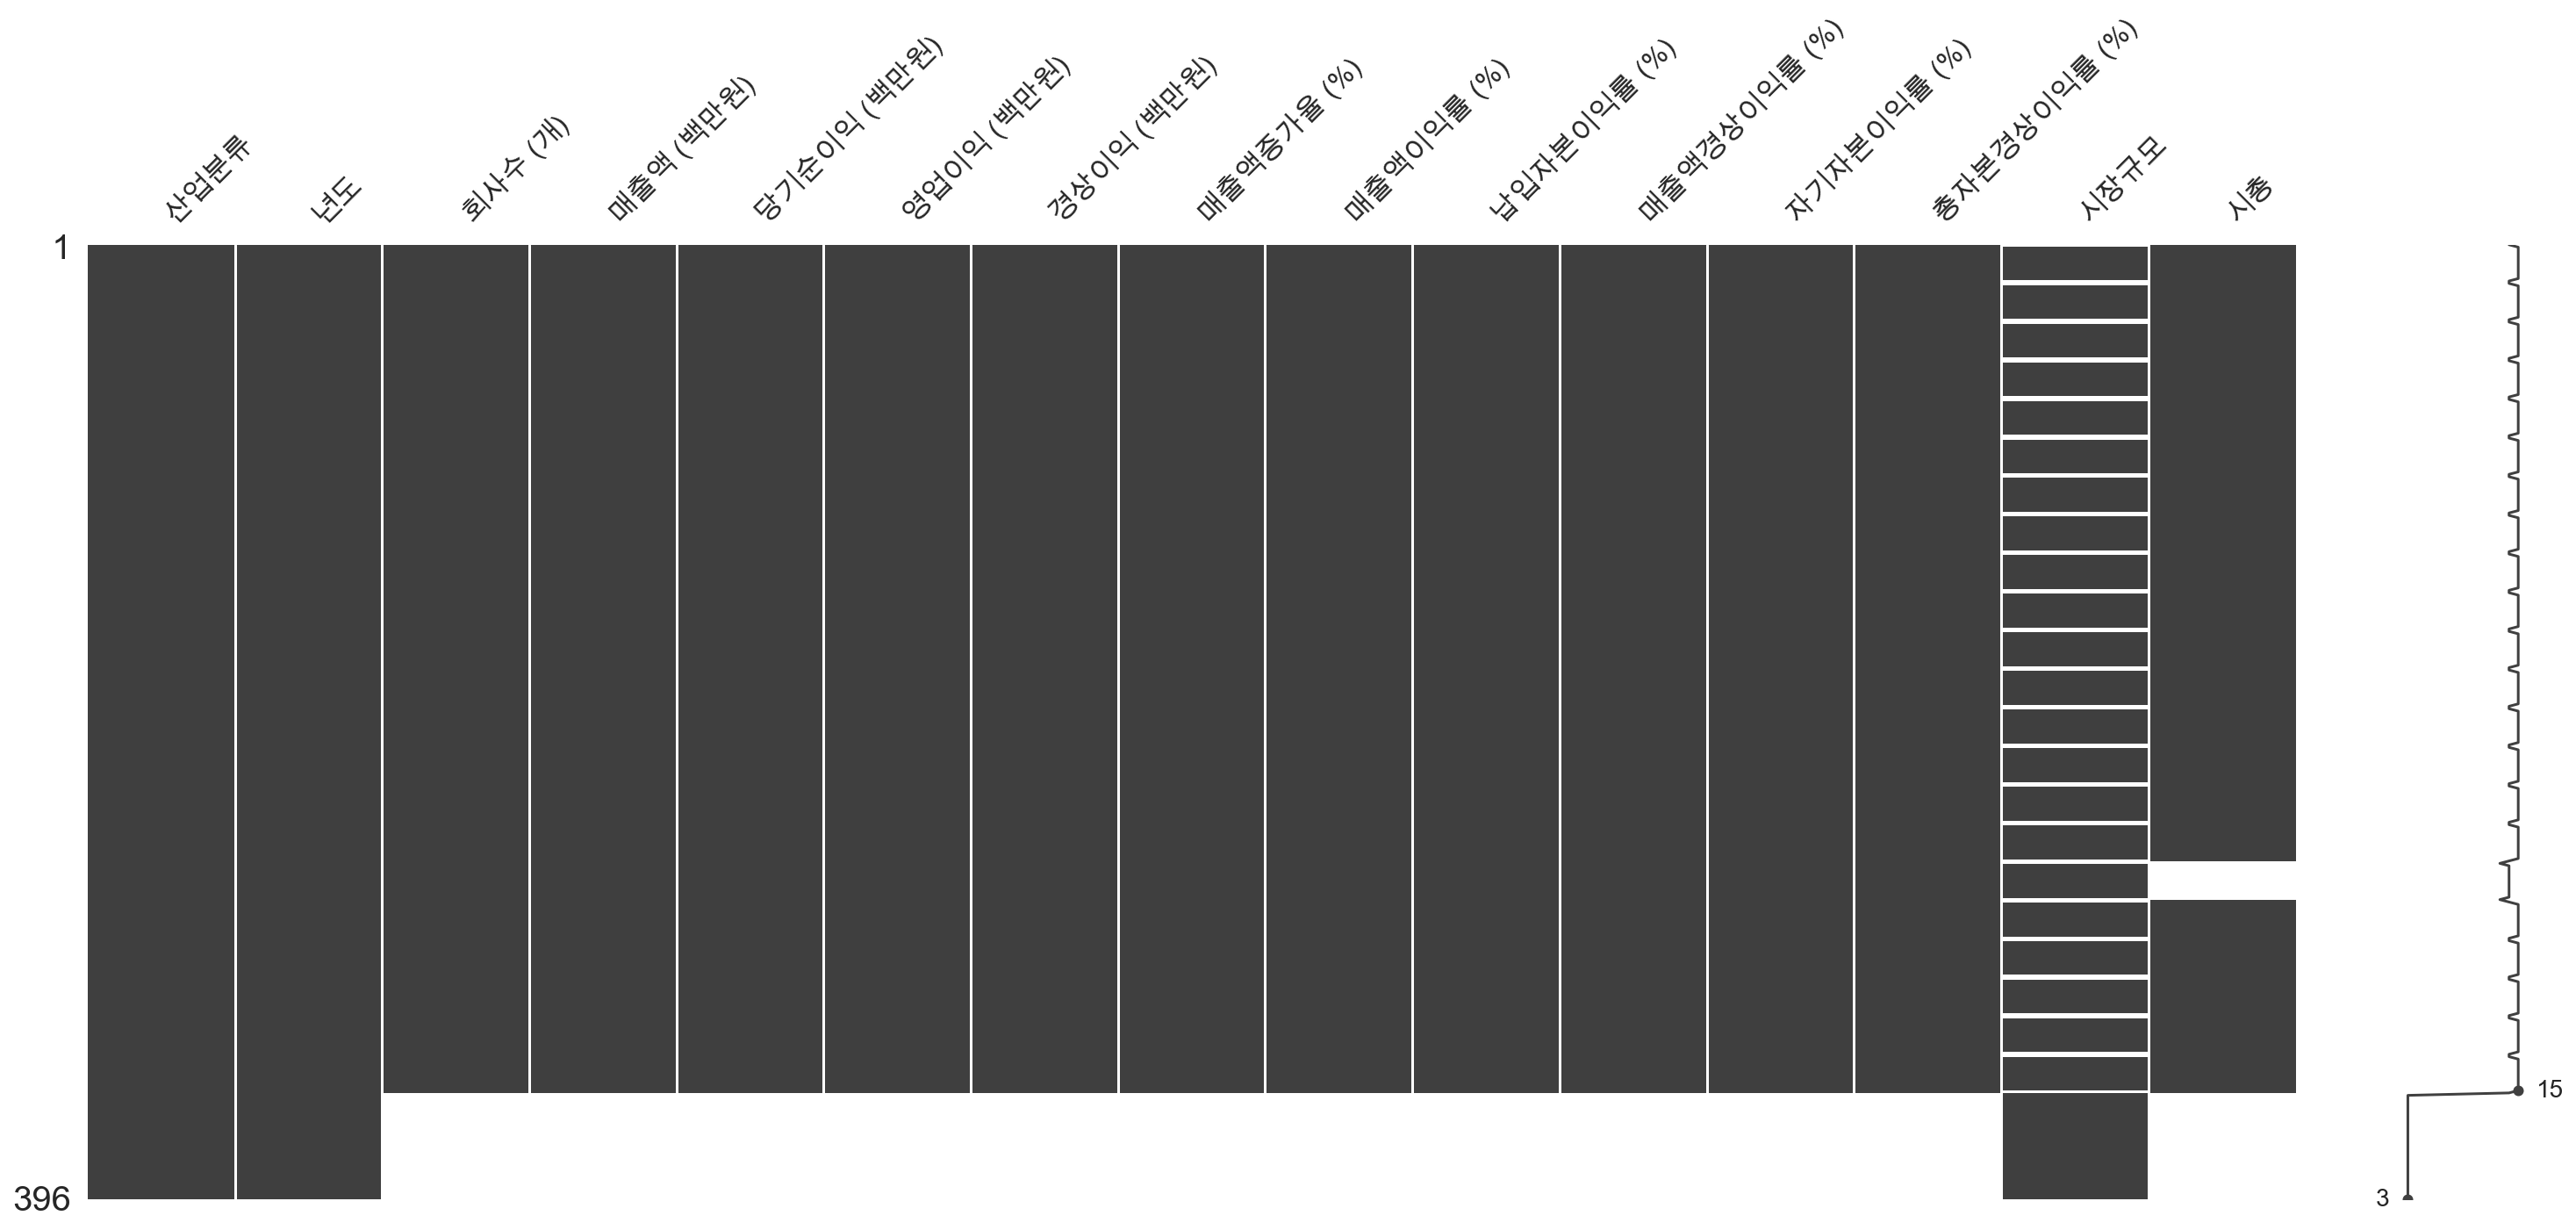

In [28]:
msno.matrix(industry_df);

In [29]:
industry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 395
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   산업분류          396 non-null    object 
 1   년도            396 non-null    int64  
 2   회사수 (개)       352 non-null    float64
 3   매출액 (백만원)     352 non-null    float64
 4   당기순이익 (백만원)   352 non-null    float64
 5   영업이익 (백만원)    352 non-null    float64
 6   경상이익 (백만원)    352 non-null    float64
 7   매출액증가율 (%)    352 non-null    float64
 8   매출액이익률 (%)    352 non-null    float64
 9   납입자본이익률 (%)   352 non-null    float64
 10  매출액경상이익률 (%)  352 non-null    float64
 11  자기자본이익률 (%)   352 non-null    float64
 12  총자본경상이익률 (%)  352 non-null    float64
 13  시장규모          352 non-null    float64
 14  시총            336 non-null    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 49.5+ KB


In [30]:
industry_df = industry_df.dropna()

In [31]:
industry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 1 to 350
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   산업분류          294 non-null    object 
 1   년도            294 non-null    int64  
 2   회사수 (개)       294 non-null    float64
 3   매출액 (백만원)     294 non-null    float64
 4   당기순이익 (백만원)   294 non-null    float64
 5   영업이익 (백만원)    294 non-null    float64
 6   경상이익 (백만원)    294 non-null    float64
 7   매출액증가율 (%)    294 non-null    float64
 8   매출액이익률 (%)    294 non-null    float64
 9   납입자본이익률 (%)   294 non-null    float64
 10  매출액경상이익률 (%)  294 non-null    float64
 11  자기자본이익률 (%)   294 non-null    float64
 12  총자본경상이익률 (%)  294 non-null    float64
 13  시장규모          294 non-null    float64
 14  시총            294 non-null    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 36.8+ KB


- 타입 정리

In [32]:
industry_df['회사수 (개)'] = industry_df['회사수 (개)'].astype('int')
industry_df['매출액 (백만원)'] = industry_df['매출액 (백만원)'].astype('int')
industry_df['당기순이익 (백만원)'] = industry_df['당기순이익 (백만원)'].astype('int')
industry_df['영업이익 (백만원)'] = industry_df['영업이익 (백만원)'].astype('int')
industry_df['경상이익 (백만원)'] = industry_df['경상이익 (백만원)'].astype('int')
industry_df['시장규모'] = industry_df['시장규모'].astype('int')
industry_df['시총'] = industry_df['시총'].astype('int')

<ipython-input-32-ba572f1443b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['회사수 (개)'] = industry_df['회사수 (개)'].astype('int')
<ipython-input-32-ba572f1443b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df['매출액 (백만원)'] = industry_df['매출액 (백만원)'].astype('int')
<ipython-input-32-ba572f1443b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [33]:
industry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 1 to 350
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   산업분류          294 non-null    object 
 1   년도            294 non-null    int64  
 2   회사수 (개)       294 non-null    int64  
 3   매출액 (백만원)     294 non-null    int64  
 4   당기순이익 (백만원)   294 non-null    int64  
 5   영업이익 (백만원)    294 non-null    int64  
 6   경상이익 (백만원)    294 non-null    int64  
 7   매출액증가율 (%)    294 non-null    float64
 8   매출액이익률 (%)    294 non-null    float64
 9   납입자본이익률 (%)   294 non-null    float64
 10  매출액경상이익률 (%)  294 non-null    float64
 11  자기자본이익률 (%)   294 non-null    float64
 12  총자본경상이익률 (%)  294 non-null    float64
 13  시장규모          294 non-null    int64  
 14  시총            294 non-null    int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 36.8+ KB


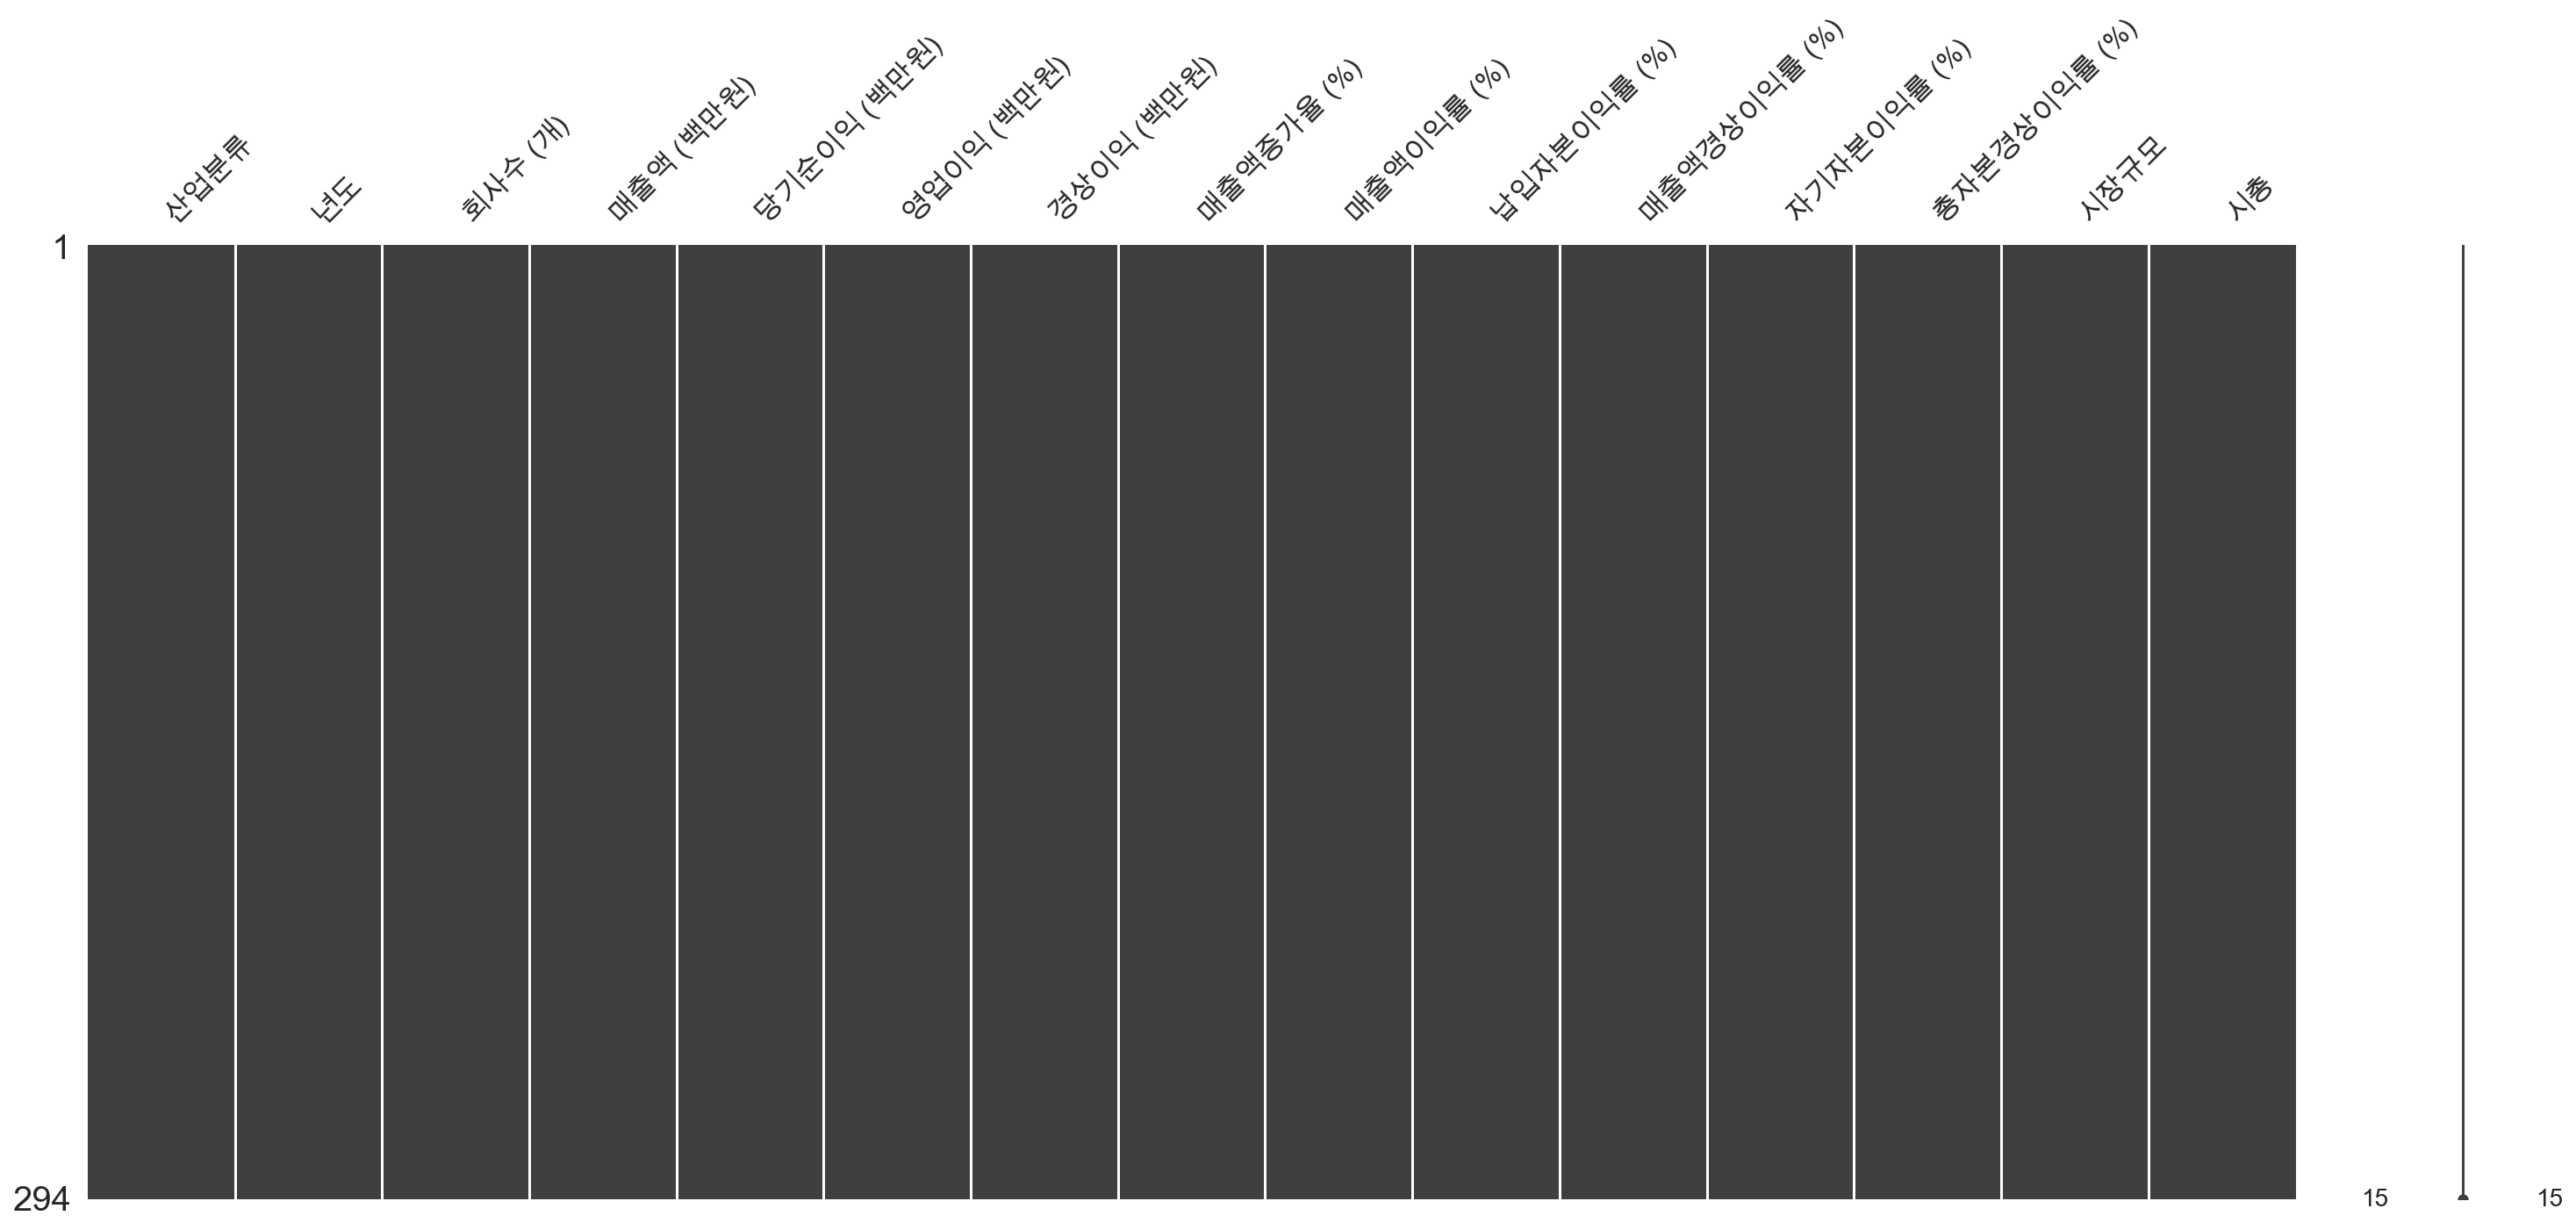

In [34]:
msno.matrix(industry_df);

## 5. 최종 dataset

In [35]:
industry_df['산업분류'].unique()

array(['건설업', '광업', '기계', '기타제조업', '농업, 임업 및 어업', '비금속광물', '서비스업', '섬유의복',
       '운수장비', '운수창고업', '유통업', '음식료품', '의료·정밀기기', '의약품', '전기가스', '전기전자',
       '종이·목재', '철강금속', '통신업', '화학', '제조업'], dtype=object)

In [36]:
industry_df['년도'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [39]:
industry_df.shape

(294, 15)

In [37]:
industry_df.to_csv('./datas/industry_merged.csv', index=False)

In [38]:
df = pd.read_csv('./datas/industry_merged.csv')
df.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,54,40785394,2029565,3096864,2885231,3.67,4.96,36.71,6.78,13.24,7.92,150470135,26444487
1,건설업,2006,57,44745972,2755247,3657870,3652228,12.41,5.85,46.30,7.95,14.79,8.86,153315180,33138291
2,건설업,2007,57,47834524,2802313,3566035,3718370,5.07,4.87,38.70,6.54,11.28,6.45,166693235,53907176
3,건설업,2008,56,53570702,3195413,3672975,4577360,16.48,4.12,37.41,6.09,9.69,5.47,180679909,22653768
4,건설업,2009,55,61989084,1812152,3385664,2769115,18.77,2.27,24.91,3.40,5.77,3.15,188031835,31828104
